In [1]:
import pandas as pd
import missingno as msno

#### encoding auf utf-8

In [3]:
import csv

input_file = 'Daten/gastro_filtered.csv'
output_file = 'test.csv'

with open(input_file, 'r', encoding='latin1') as f_in, open(output_file, 'w', newline='', encoding='utf-8') as f_out:
    reader = csv.reader(f_in)
    writer = csv.writer(f_out)
    for row in reader:
        writer.writerow([cell.encode('latin1').decode('utf-8') for cell in row])


In [15]:
import chardet

with open('Daten/gastro_filtered.csv', 'rb') as f:
    result = chardet.detect(f.read())

print(result['encoding'])

utf-8


In [16]:
import csv

# Funktion zur Korrektur der Umlaute
def korrigiere_umlaute(text):
    umlaute = {'ÃÂ¤': 'ä', 'ÃÂ¶': 'ö', 'ÃÂ¼': 'ü', 'ÃÂ': 'Ä', 'Ãâ': 'Ö', 'Ãâ': 'Ü', 'ÃÅ': 'ß'}
    for k, v in umlaute.items():
        text = text.replace(k, v)
    return text

# Pfad zur ursprünglichen CSV-Datei
csv_datei = 'Daten/gastro_filtered.csv'
# Pfad zur neuen CSV-Datei
neue_csv_datei = 'test.csv'

# CSV-Datei öffnen und um Umlaute korrigieren
with open(csv_datei, 'r', encoding='utf-8') as eingabe_datei, \
     open(neue_csv_datei, 'w', newline='', encoding='utf-8') as ausgabe_datei:
    csv_reader = csv.reader(eingabe_datei)
    csv_writer = csv.writer(ausgabe_datei)
    
    for zeile in csv_reader:
        korrigierte_zeile = [korrigiere_umlaute(wort) for wort in zeile]
        csv_writer.writerow(korrigierte_zeile)

print("Umlaute erfolgreich korrigiert und CSV-Datei gespeichert.")


Umlaute erfolgreich korrigiert und CSV-Datei gespeichert.


# Gastroumsatz

In [13]:
file = "Daten/gastro_filtered.csv"
df_gastro = pd.read_csv(file, delimiter=",")

<Axes: >

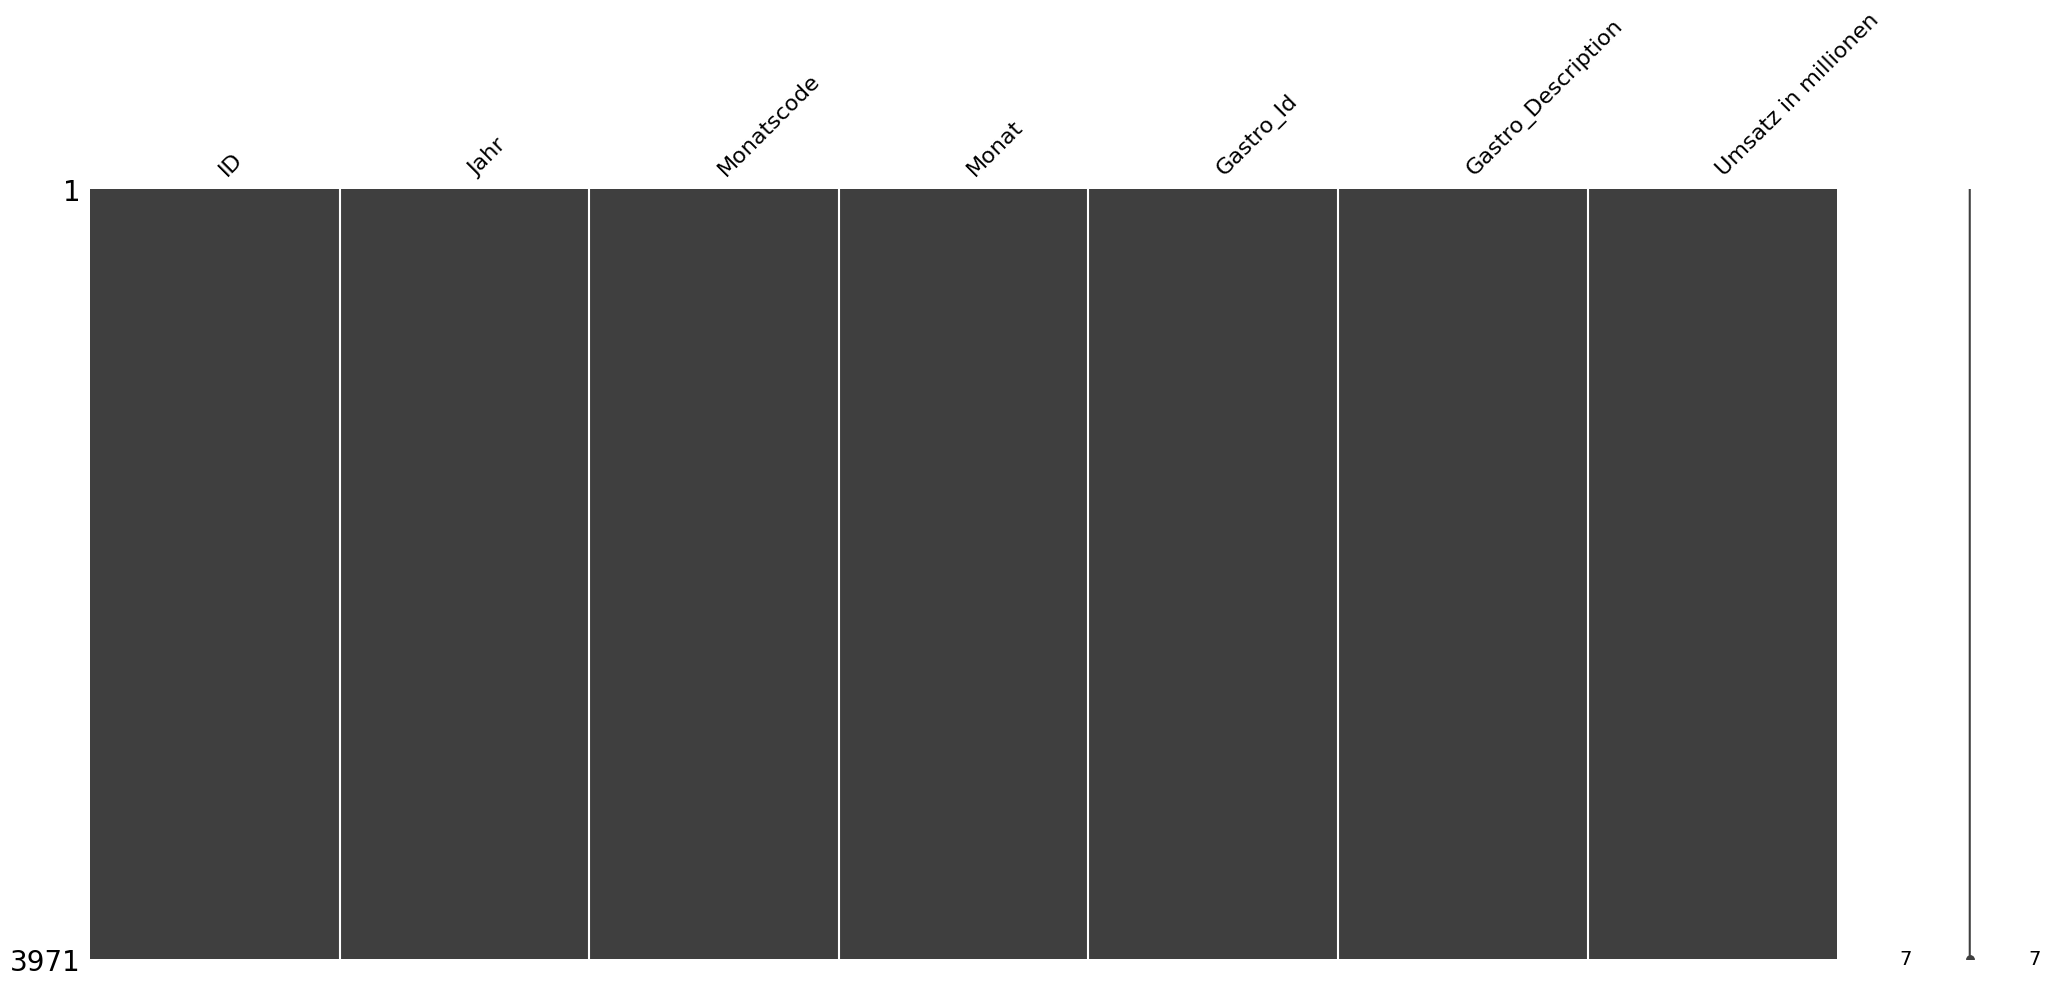

In [10]:
msno.matrix(df_gastro)

In [14]:
df_gastro

,ID,Jahr,Monatscode,Monat,Gastro_Id,Gastro_Description,Umsatz in millionen
0,0,1994,MONAT01,Januar,WZ08-55,Beherbergung,92.3
1,1,1994,MONAT01,Januar,WZ08-551,"Hotels, GasthÃÂ¶fe und Pensionen",91.9
2,2,1994,MONAT01,Januar,WZ08-552,FerienunterkÃÂ¼nfte u. ÃÂ¤hnliche Beherbergu...,97.3
3,3,1994,MONAT01,Januar,WZ08-553,CampingplÃÂ¤tze,68.4
4,4,1994,MONAT01,Januar,WZ08-559,Sonstige BeherbergungsstÃÂ¤tten,127.1
...,...,...,...,...,...,...,...
3966,3966,2024,MONAT01,Januar,WZ08-561,"Restaurants, GaststÃÂ¤tten, Imbissstuben, Caf...",76.6
3967,3967,2024,MONAT01,Januar,WZ08-562,Caterer und sonstige Verpflegungsdienstleistungen,87.4
3968,3968,2024,MONAT01,Januar,WZ08-563,Ausschank von GetrÃÂ¤nken,52.0
3969,3969,2024,MONAT01,Januar,WZ08-561-01,GaststÃÂ¤ttengewerbe,74.1


In [4]:

# Umbenennen von Spalten
#df_gastro = df_gastro.rename(columns={'Zeit': 'Jahr', '4_Auspraegung_Label': 'Monat', "5_Auspraegung_Code": "Unternehmen_Id", "5_Auspraegung_Label": "Unternehmensbeschreibung","UMS002__Umsatz__2015=100" : "Umsatz in millionen"})
df_gastro = df_gastro.rename(columns={"4_Auspraegung_Code": "Monatscode"})

# Speichern der aktualisierten Daten in einer neuen CSV-Datei
df_gastro.to_csv(file, index=False)

print("Die Spalten wurden erfolgreich umbenannt und die aktualisierte CSV-Datei wurde gespeichert.")


Die Spalten wurden erfolgreich umbenannt und die aktualisierte CSV-Datei wurde gespeichert.


## Wetterdaten formatieren
von .txt zu .csv

In [17]:
import os

# Definiere den Ordnerpfad
ordnerpfad = './Wetterdaten'

# Durchlaufe jeden Ordner im Hauptordner
for ordnername in os.listdir(ordnerpfad):
    # Überprüfe, ob es sich um einen Ordner handelt
    if os.path.isdir(os.path.join(ordnerpfad, ordnername)):
        # Durchlaufe jede Datei im Unterordner
        unterordner_pfad = os.path.join(ordnerpfad, ordnername)
        for dateiname in os.listdir(unterordner_pfad):
            # Überprüfe, ob die Datei eine .txt-Datei ist
            if dateiname.endswith('.txt'):
                # Baue den alten und neuen Dateinamen
                alter_pfad = os.path.join(unterordner_pfad, dateiname)
                neuer_name = os.path.splitext(dateiname)[0] + '.csv'
                neuer_pfad = os.path.join(unterordner_pfad, neuer_name)
                
                # Umbenenne die Datei
                os.rename(alter_pfad, neuer_pfad)

FileNotFoundError: [WinError 3] The system cannot find the path specified: './Wetterdaten'

In [ ]:
import csv
import re

def replace_umlauts(name):
    # Ersetze 'ä' mit 'ae', 'ö' mit 'oe', 'ü' mit 'ue'
    name = re.sub(r'ä', 'ae', name)
    name = re.sub(r'ö', 'oe', name)
    name = re.sub(r'ü', 'ue', name)
    return name

# Pfad zur CSV-Datei
csv_file = './Umsatzdaten/Gastronomieumsaetze_flat.csv'
# Pfad zur Ausgabedatei
output_file = 'Gastronomieumsaetze_flat_update.csv'

with open(csv_file, newline='', encoding='latin-1') as infile, \
        open(output_file, 'w', newline='', encoding='utf-8') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)

    for row in reader:
        # Durchlaufe jede Zeile und ersetze die Namen
        modified_row = [replace_umlauts(cell) for cell in row]
        # Schreibe die modifizierte Zeile in die Ausgabedatei
        writer.writerow(modified_row)

print("CSV-Datei wurde erfolgreich verarbeitet.")

CSV-Datei wurde erfolgreich verarbeitet.


In [13]:
df_gastro['Umsatz in millionen'] = df_gastro['Umsatz in millionen'].str.replace(',', '.').astype(float)

In [16]:
df_gastro.to_csv(file, index=False)

In [6]:
monatstat = df_gastro.groupby(["Gastro_Description", "Monatscode"])["Umsatz in millionen"].sum()

In [7]:
spalte_a_wert = 'Gastro_Description'
gewuenschter_wert = monatstat.loc["Gastgewerbe"]
gewuenschter_wert

Monatscode
MONAT01    2865.9
MONAT02    2808.9
MONAT03    3122.7
MONAT04    3198.0
MONAT05    3575.9
MONAT06    3545.8
MONAT07    3628.7
MONAT08    3638.4
MONAT09    3739.7
MONAT10    3605.1
MONAT11    3109.0
MONAT12    3313.1
Name: Umsatz in millionen, dtype: float64

# Erweitern des Datum
Monat und Jahr zusammengefasst in einer Spalte 

In [1]:
import pandas as pd

In [2]:
df_gastro = pd.read_csv("Daten/cleaned_data/gastro_filtered.csv")

In [24]:
column_to_drop = ["Monat_id"]
df_gastro = df_gastro.drop(columns=column_to_drop)

In [15]:
df_gastro

,ID,Jahr,Monat,Gastro_Id,Gastro_Description,Umsatz in millionen,Monat_id
0,0,1994,Januar,WZ08-55,Beherbergung,92.3,1
1,1,1994,Januar,WZ08-551,"Hotels, Gasthöfe und Pensionen",91.9,1
2,2,1994,Januar,WZ08-552,Ferienunterkünfte u. ähnliche Beherbergungsstä...,97.3,1
3,3,1994,Januar,WZ08-553,Campingplätze,68.4,1
4,4,1994,Januar,WZ08-559,Sonstige Beherbergungsstätten,127.1,1
...,...,...,...,...,...,...,...
3966,3966,2024,Januar,WZ08-561,"Restaurants, Gaststätten, Imbissstuben, Cafes ...",76.6,1
3967,3967,2024,Januar,WZ08-562,Caterer und sonstige Verpflegungsdienstleistungen,87.4,1
3968,3968,2024,Januar,WZ08-563,Ausschank von Getränken,52.0,1
3969,3969,2024,Januar,WZ08-561-01,Gaststättengewerbe,74.1,1


In [8]:
# Dictionary für die Umwandlung von Monatsnamen zu Zahlen
monat_dict = {
    'Januar': 1,
    'Februar': 2,
    'März': 3,
    'April': 4,
    'Mai': 5,
    'Juni': 6,
    'Juli': 7,
    'August': 8,
    'September': 9,
    'Oktober': 10,
    'November': 11,
    'Dezember': 12
}

In [9]:
df_gastro["Monat_id"] = df_gastro["Monat"].map(monat_dict)

In [17]:
from datetime import datetime
# Kombinieren von Jahr, Monat_Nummer und Tag (1) zu einem DateTime-Objekt
df_gastro['Datum'] = df_gastro.apply(lambda row: datetime(row['Jahr'], row['Monat_id'], 1), axis=1)


In [25]:
df_gastro

,ID,Gastro_Id,Gastro_Description,Umsatz in millionen,Datum
0,0,WZ08-55,Beherbergung,92.3,1994-01-01
1,1,WZ08-551,"Hotels, Gasthöfe und Pensionen",91.9,1994-01-01
2,2,WZ08-552,Ferienunterkünfte u. ähnliche Beherbergungsstä...,97.3,1994-01-01
3,3,WZ08-553,Campingplätze,68.4,1994-01-01
4,4,WZ08-559,Sonstige Beherbergungsstätten,127.1,1994-01-01
...,...,...,...,...,...
3966,3966,WZ08-561,"Restaurants, Gaststätten, Imbissstuben, Cafes ...",76.6,2024-01-01
3967,3967,WZ08-562,Caterer und sonstige Verpflegungsdienstleistungen,87.4,2024-01-01
3968,3968,WZ08-563,Ausschank von Getränken,52.0,2024-01-01
3969,3969,WZ08-561-01,Gaststättengewerbe,74.1,2024-01-01


In [26]:
df_gastro.to_csv("Daten/cleaned_data/Gastro_Filter_v2.csv")